In [ ]:
from tensorflow.keras.utils import normalize
import os
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.optimizers import Adam
import glob

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
image_directory = '/content/gdrive/My Drive/Segmentation/GoldStdImages/'
mask_directory = '/content/gdrive/My Drive/Segmentation/MasksBW/'

In [ ]:
SIZE = 512
num_images = 198

Load images and masks in order so they match

In [ ]:
image_names = glob.glob("/content/gdrive/My Drive/Segmentation/GoldStdImages/*.jpg")
print(image_names)

['/content/gdrive/My Drive/Segmentation/GoldStdImages/ID_004c4b319.jpg', '/content/gdrive/My Drive/Segmentation/GoldStdImages/ID_02e2d273d.jpg', '/content/gdrive/My Drive/Segmentation/GoldStdImages/ID_045196c9f.jpg', '/content/gdrive/My Drive/Segmentation/GoldStdImages/ID_0513bfa29.jpg', '/content/gdrive/My Drive/Segmentation/GoldStdImages/ID_053172482.jpg', '/content/gdrive/My Drive/Segmentation/GoldStdImages/ID_056e14224.jpg', '/content/gdrive/My Drive/Segmentation/GoldStdImages/ID_07ad70ea0.jpg', '/content/gdrive/My Drive/Segmentation/GoldStdImages/ID_07c565939.jpg', '/content/gdrive/My Drive/Segmentation/GoldStdImages/ID_0f91fde95.jpg', '/content/gdrive/My Drive/Segmentation/GoldStdImages/ID_1147d3c37.jpg', '/content/gdrive/My Drive/Segmentation/GoldStdImages/ID_1193c693f.jpg', '/content/gdrive/My Drive/Segmentation/GoldStdImages/ID_12534e78f.jpg', '/content/gdrive/My Drive/Segmentation/GoldStdImages/ID_16b052b18.jpg', '/content/gdrive/My Drive/Segmentation/GoldStdImages/ID_187239b

In [ ]:
image_names.sort()
print(image_names)

['/content/gdrive/My Drive/Segmentation/GoldStdImages/ID_004c4b319.jpg', '/content/gdrive/My Drive/Segmentation/GoldStdImages/ID_02e2d273d.jpg', '/content/gdrive/My Drive/Segmentation/GoldStdImages/ID_045196c9f.jpg', '/content/gdrive/My Drive/Segmentation/GoldStdImages/ID_0513bfa29.jpg', '/content/gdrive/My Drive/Segmentation/GoldStdImages/ID_053172482.jpg', '/content/gdrive/My Drive/Segmentation/GoldStdImages/ID_056e14224.jpg', '/content/gdrive/My Drive/Segmentation/GoldStdImages/ID_07ad70ea0.jpg', '/content/gdrive/My Drive/Segmentation/GoldStdImages/ID_07c565939.jpg', '/content/gdrive/My Drive/Segmentation/GoldStdImages/ID_0b1ee8428.jpg', '/content/gdrive/My Drive/Segmentation/GoldStdImages/ID_0f91fde95.jpg', '/content/gdrive/My Drive/Segmentation/GoldStdImages/ID_1147d3c37.jpg', '/content/gdrive/My Drive/Segmentation/GoldStdImages/ID_1193c693f.jpg', '/content/gdrive/My Drive/Segmentation/GoldStdImages/ID_12534e78f.jpg', '/content/gdrive/My Drive/Segmentation/GoldStdImages/ID_16b052b

In [ ]:
image_names_subset = image_names[0:num_images]

In [ ]:
images = [cv2.imread(img, 0) for img in image_names_subset]

In [ ]:
image_dataset = np.array(images)
image_dataset = np.expand_dims(image_dataset, axis = 3)

Read masks the same way. 

In [ ]:
mask_names = glob.glob("/content/gdrive/My Drive/Segmentation/Masks/*.jpg")
mask_names.sort()
mask_names_subset = mask_names[0:num_images]
masks = [cv2.imread(mask, 0) for mask in mask_names_subset]
mask_dataset = np.array(masks)
mask_dataset = np.expand_dims(mask_dataset, axis = 3)

In [ ]:
index1 = 0
for i in mask_dataset:
 a = mask_dataset[index1]
 index1 += 1
 index2 = 0
 for j in i:
   b = a[index2]
   index2 += 1
   index3 = 0
   for k in j:
     c = b[index3]
     index3 += 1
     index4 = 0
     for l in k:
       if c[index4] < 9:
        c[index4] = 0
       elif c[index4] > 246:
         c[index4] = 255


In [ ]:
x = np.array([[3, 3], [5, 6]])
print(x)
index1 = 0
for i in x:
  a = x[index1]
  index1 += 1
  index2 = 0
  for j in i:
    if a[index2] < 4:
      a[index2] = 0
    elif a[index2] > 4:
      a[index2] = 9
    index2 += 1
print(x)


[[3 3]
 [5 6]]
[[0 0]
 [9 9]]


In [ ]:
mask_dataset

In [ ]:
for i in mask_dataset:
 for j in i:
   for k in j:
     for l in k:
       if l != 0 and l != 255:
         print(l)

In [ ]:
print("Image data shape is: ", image_dataset.shape)
print("Mask data shape is: ", mask_dataset.shape)
print("Max pixel value in image is: ", image_dataset.max())
print("Labels in the mask are : ", np.unique(mask_dataset))

Image data shape is:  (198, 512, 512, 1)
Mask data shape is:  (198, 512, 512, 1)
Max pixel value in image is:  255
Labels in the mask are :  [  0 255]


In [ ]:
#scaler = MinMaxScaler()

In [ ]:
#test_image_data=scaler.fit_transform(image_dataset_uint8.reshape(-1, image_dataset_uint8.shape[-1])).reshape(image_dataset_uint8.shape)

In [ ]:
#Normalize images
image_dataset = image_dataset /255.  #Can also normalize or scale using MinMax scaler
#Do not normalize masks, just rescale to 0 to 1.
mask_dataset = mask_dataset /255.  #PIxel values will be 0 or 1

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_dataset, mask_dataset, test_size = 0.20, random_state = 42)


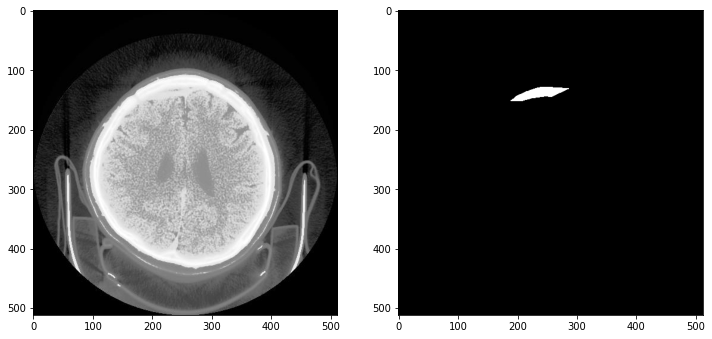

In [ ]:
#Sanity check, view few mages
import random

image_number = random.randint(0, len(X_train)-1)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(X_train[image_number,:,:,0], cmap='gray')
plt.subplot(122)
plt.imshow(y_train[image_number,:,:,0], cmap='gray')
plt.show()

In [ ]:
# Building Unet by dividing encoder and decoder into blocks

from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from keras.optimizers import Adam
from keras.layers import Activation, MaxPool2D, Concatenate


def conv_block(input, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(input)
    x = BatchNormalization()(x)   #Not in the original network. 
    x = Activation("relu")(x)

    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)  #Not in the original network
    x = Activation("relu")(x)

    return x

#Encoder block: Conv block followed by maxpooling


def encoder_block(input, num_filters):
    x = conv_block(input, num_filters)
    p = MaxPool2D((2, 2))(x)
    return x, p   

#Decoder block
#skip features gets input from encoder for concatenation

def decoder_block(input, skip_features, num_filters):
    x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(input)
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters)
    return x

#Build Unet using the blocks
def build_unet(input_shape, n_classes):
    inputs = Input(input_shape)

    s1, p1 = encoder_block(inputs, 2 * 64)
    s2, p2 = encoder_block(p1, 2 * 128)
    s3, p3 = encoder_block(p2, 2 * 256)
    s4, p4 = encoder_block(p3, 2 * 512)

    b1 = conv_block(p4, 2 * 1024) #Bridge

    d1 = decoder_block(b1, s4, 2 * 512)
    d2 = decoder_block(d1, s3, 2 * 256)
    d3 = decoder_block(d2, s2, 2 * 128)
    d4 = decoder_block(d3, s1, 2 * 64)

    if n_classes == 1:  #Binary
      activation = 'sigmoid'
    else:
      activation = 'softmax'

    outputs = Conv2D(n_classes, 1, padding="same", activation=activation)(d4)  #Change the activation based on n_classes
    print(activation)

    model = Model(inputs, outputs, name="U-Net")
    return model

In [ ]:
IMG_HEIGHT = image_dataset.shape[1]
IMG_WIDTH  = image_dataset.shape[2]
IMG_CHANNELS = image_dataset.shape[3]

input_shape = (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)

In [ ]:
print(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)

512 512 1


In [ ]:
model = build_unet(input_shape, n_classes=1)
model.compile(optimizer=Adam(learning_rate = 1e-3), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

In [ ]:
history = model.fit(X_train, y_train, 
                    batch_size = 16, 
                    verbose=1, 
                    epochs=10, 
                    validation_data=(X_test, y_test), 
                    shuffle=False)


Epoch 1/10
10/10 [==============================] - 8s 535ms/step - loss: 0.2775 - accuracy: 0.9466 - val_loss: 11.6691 - val_accuracy: 0.7366
Epoch 2/10
10/10 [==============================] - 5s 479ms/step - loss: 0.0972 - accuracy: 0.9914 - val_loss: 1243.2677 - val_accuracy: 0.2726
Epoch 3/10
10/10 [==============================] - 5s 479ms/step - loss: 0.0732 - accuracy: 0.9914 - val_loss: 1615.2206 - val_accuracy: 0.0983
Epoch 4/10
10/10 [==============================] - 5s 481ms/step - loss: 0.0627 - accuracy: 0.9915 - val_loss: 306.6909 - val_accuracy: 0.2661
Epoch 5/10
10/10 [==============================] - 5s 480ms/step - loss: 0.0567 - accuracy: 0.9915 - val_loss: 21.9228 - val_accuracy: 0.1344
Epoch 6/10
10/10 [==============================] - 5s 480ms/step - loss: 0.0533 - accuracy: 0.9915 - val_loss: 10.0915 - val_accuracy: 0.0866
Epoch 7/10
10/10 [==============================] - 5s 479ms/step - loss: 0.0509 - accuracy: 0.9915 - val_loss: 7.5854 - val_accuracy: 0.

In [ ]:
#Save the model for future use
model.save('/content/gdrive/My Drive/Segmentation/brain_unet3.hdf5')

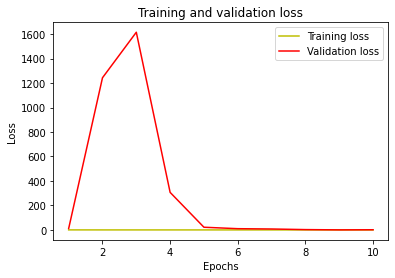

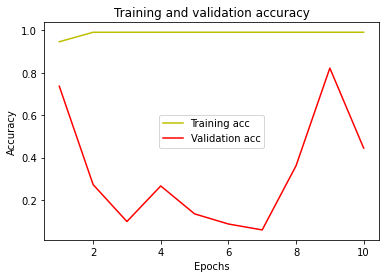

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#Load previously saved model
from keras.models import load_model
model = load_model("/content/gdrive/My Drive/Segmentation/brain_unet3.hdf5", compile=False)
        

In [ ]:
#IOU
y_pred=model.predict(X_test)
y_pred_thresholded = y_pred > 0.5

2/2 [==============================] - 1s 290ms/step


In [ ]:
from tensorflow.keras.metrics import MeanIoU

In [ ]:
n_classes = 2
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(y_pred_thresholded, y_test)
print("Mean IoU =", IOU_keras.result().numpy())

In [ ]:
threshold = 0.5
test_img_number = random.randint(0, len(X_test)-1)
test_img = X_test[test_img_number]
ground_truth=y_test[test_img_number]
test_img_input=np.expand_dims(test_img, 0)
print(test_img_input.shape)
prediction = (model.predict(test_img_input)[0,:,:,0] > 0.5).astype(np.uint8)
print(prediction.shape)

plt.figure(figsize=(16, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,0], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth[:,:,0], cmap='gray')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(prediction, cmap='gray')

plt.show()